In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from keras.datasets import mnist

# trainに60000個の訓練用データ、testに10000個のテストデータが入る
(x_train,y_train),(x_test,y_test) = mnist.load_data()

<hr>
<hr>

# データ図示

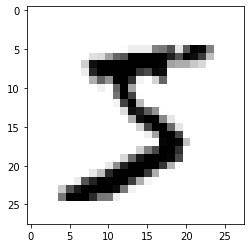

↑の目標値：5


In [3]:
#最初のデータだけ図示
x0 = x_train[0]

# ヒートマップにして表示
plt.figure()
plt.imshow(x0,interpolation='nearest',vmin=0,vmax=255,cmap='binary')
plt.show()

#ちなみに認識結果（目標値）は
print('↑の目標値：{0}'.format(y_train[0]))

<hr>
<hr>

# データ変形

In [4]:
from keras.utils import np_utils

In [5]:
#行列の型を変換
x_train = x_train.reshape(60000,28*28)
#float型に変換
x_train = x_train.astype('float32')
#0~1の値に収める
x_train = x_train/255
#目標データも1-of-K符号化法で表す
y_train = np_utils.to_categorical(y_train,10)

In [6]:
#同じことをテストデータに対しても行う
x_test = x_test.reshape(10000,28*28)
x_test = x_test.astype('float32')
x_test = x_test/255
y_test = np_utils.to_categorical(y_test,10)

<hr>
<hr>

# 学習

In [7]:
#ニューラルネットワークの定義
from keras.models import Sequential
from keras.layers import Dense,Activation
from keras.optimizers import Adam

#モデルの定義
model = Sequential()
#784次元を入力とする16個の中間層を定義する。活性化関数はシグモイド関数
model.add(Dense(16,input_dim=784,activation='sigmoid'))
#10個の出力層を定義する。活性化関数はソフトマックス関数
model.add(Dense(10,activation='softmax'))
#学習方法の設定。目的関数を交差エントロピー誤差、学習の評価として正答率を計算、アルゴリズムをAdamに設定
model.compile(loss='categorical_crossentropy',optimizer=Adam(),metrics=['accuracy'])

In [8]:
#学習を行わせる。trainは訓練データ、全データを学習に使う回数:10、validation_dataにテストデータ。(verbose=1で進行状況表示)
history=model.fit(x_train,y_train,epochs=10,batch_size=1000,verbose=1,validation_data=(x_test,y_test))
#学習の評価値を出力
score=model.evaluate(x_test,y_test,verbose=0)


print('交差エントロピー誤差:',score[0])
print('正答率:',score[1])

Epoch 1/10
60/60 [==============================] - 0s 5ms/step - loss: 2.0071 - accuracy: 0.4670 - val_loss: 1.7134 - val_accuracy: 0.7073
Epoch 2/10
60/60 [==============================] - 0s 3ms/step - loss: 1.5380 - accuracy: 0.7528 - val_loss: 1.3659 - val_accuracy: 0.7871
Epoch 3/10
60/60 [==============================] - 0s 3ms/step - loss: 1.2467 - accuracy: 0.8045 - val_loss: 1.1211 - val_accuracy: 0.8240
Epoch 4/10
60/60 [==============================] - 0s 4ms/step - loss: 1.0357 - accuracy: 0.8343 - val_loss: 0.9420 - val_accuracy: 0.8510
Epoch 5/10
60/60 [==============================] - 0s 5ms/step - loss: 0.8811 - accuracy: 0.8530 - val_loss: 0.8112 - val_accuracy: 0.8648
Epoch 6/10
60/60 [==============================] - 0s 4ms/step - loss: 0.7665 - accuracy: 0.8660 - val_loss: 0.7127 - val_accuracy: 0.8739
Epoch 7/10
60/60 [==============================] - 0s 4ms/step - loss: 0.6801 - accuracy: 0.8753 - val_loss: 0.6384 - val_accuracy: 0.8828
Epoch 8/10
60/60 [==

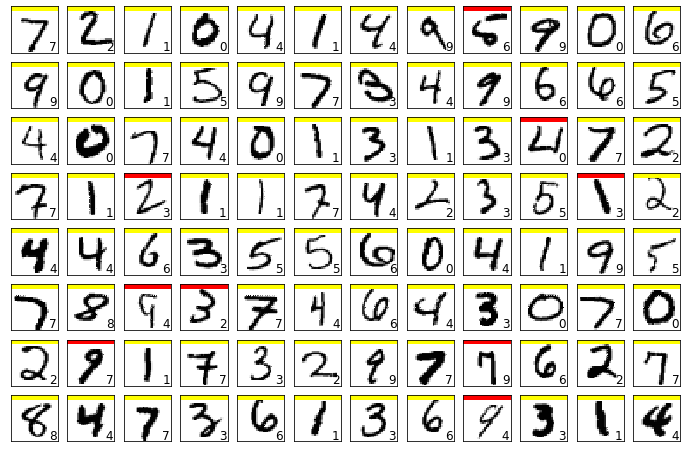

In [9]:
#実際にテストデータを何個か評価してみる
y=model.predict(x_test)
plt.figure(2,figsize=(12,8))
plt.gray()
for i in range(12*8):
    plt.subplot(8,12,i+1)
    x=x_test[i,:]
    x=x.reshape(28,28)
    plt.pcolor(1-x)
    wk=y[i,:]
    prediction=np.argmax(wk)
    plt.text(22,25.5,"%d" % prediction, fontsize=12)
    if prediction != np.argmax(y_test[i,:]):
        plt.plot([0,27],[1,1],color='red',linewidth=5)
    else:
        plt.plot([0,27],[1,1],color='yellow',linewidth=5)
    plt.xlim(0,27)
    plt.ylim(27,0)
    plt.xticks([],"")
    plt.yticks([],"")

plt.show()    

<hr>
<hr>

# ReLUで学習

In [10]:
#モデルの定義
model = Sequential()
#784次元を入力とする16個の中間層を定義する。活性化関数はReLU関数
model.add(Dense(16,input_dim=784,activation='relu'))
#10個の出力層を定義する。活性化関数はソフトマックス関数
model.add(Dense(10,activation='softmax'))
#学習方法の設定。目的関数を交差エントロピー誤差、学習の評価として正答率を計算、アルゴリズムをAdamに設定
model.compile(loss='categorical_crossentropy',optimizer=Adam(),metrics=['accuracy'])

#学習を行わせる。trainは訓練データ、全データを学習に使う回数:10、validation_dataにテストデータ。(verbose=1で進行状況表示)
history=model.fit(x_train,y_train,epochs=10,batch_size=1000,verbose=1,validation_data=(x_test,y_test))
#学習の評価値を出力
score=model.evaluate(x_test,y_test,verbose=0)


print('交差エントロピー誤差:',score[0])
print('正答率:',score[1])

Epoch 1/10
60/60 [==============================] - 0s 4ms/step - loss: 1.4699 - accuracy: 0.5775 - val_loss: 0.8487 - val_accuracy: 0.8176
Epoch 2/10
60/60 [==============================] - 0s 3ms/step - loss: 0.6705 - accuracy: 0.8461 - val_loss: 0.5157 - val_accuracy: 0.8736
Epoch 3/10
60/60 [==============================] - 0s 2ms/step - loss: 0.4725 - accuracy: 0.8794 - val_loss: 0.4055 - val_accuracy: 0.8931
Epoch 4/10
60/60 [==============================] - 0s 3ms/step - loss: 0.3886 - accuracy: 0.8960 - val_loss: 0.3477 - val_accuracy: 0.9052
Epoch 5/10
60/60 [==============================] - 0s 3ms/step - loss: 0.3443 - accuracy: 0.9057 - val_loss: 0.3199 - val_accuracy: 0.9119
Epoch 6/10
60/60 [==============================] - 0s 4ms/step - loss: 0.3185 - accuracy: 0.9115 - val_loss: 0.2986 - val_accuracy: 0.9164
Epoch 7/10
60/60 [==============================] - 0s 2ms/step - loss: 0.3008 - accuracy: 0.9159 - val_loss: 0.2857 - val_accuracy: 0.9210
Epoch 8/10
60/60 [==

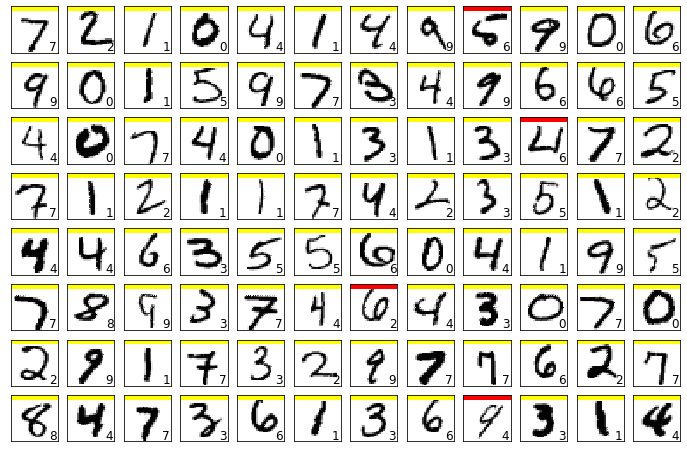

In [11]:
#再評価
#実際にテストデータを何個か評価してみる
y=model.predict(x_test)
plt.figure(2,figsize=(12,8))
plt.gray()
for i in range(12*8):
    plt.subplot(8,12,i+1)
    x=x_test[i,:]
    x=x.reshape(28,28)
    plt.pcolor(1-x)
    wk=y[i,:]
    prediction=np.argmax(wk)
    plt.text(22,25.5,"%d" % prediction, fontsize=12)
    if prediction != np.argmax(y_test[i,:]):
        plt.plot([0,27],[1,1],color='red',linewidth=5)
    else:
        plt.plot([0,27],[1,1],color='yellow',linewidth=5)
    plt.xlim(0,27)
    plt.ylim(27,0)
    plt.xticks([],"")
    plt.yticks([],"")

plt.show()  

<hr>
<hr>

# フィルター適用

In [12]:
#リセット
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [13]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense,Activation
from keras.optimizers import Adam

In [14]:
#データ再読み込み
(x_train,y_train),(x_test,y_test) = mnist.load_data()

#最初のデータ
x0 = x_train[0]

x_train = x_train.reshape(60000,28*28)
x_train = x_train.astype('float32')
x_train = x_train/255
y_train = np_utils.to_categorical(y_train,10)

x_test = x_test.reshape(10000,28*28)
x_test = x_test.astype('float32')
x_test = x_test/255
y_test = np_utils.to_categorical(y_test,10)

In [15]:
#3*3フィルター
filter = np.array([[0,1,1],[0,1,1],[0,1,1]])
print(filter)


[[0 1 1]
 [0 1 1]
 [0 1 1]]


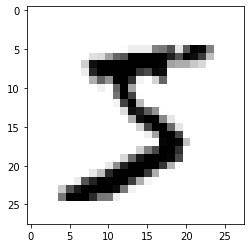

In [16]:
#元画像の表示
plt.figure()
plt.imshow(x0,interpolation='nearest',vmin=0,vmax=255,cmap='binary')
plt.show()

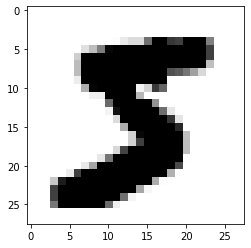

In [17]:
#フィルター適用
def do_filter(x,f):
    filtered=np.zeros((len(x),len(x[0])))
    for i in range(len(x)):
        if(i==0 or i==len(x)-1):
            continue
        else:
            for j in range(len(x[0]-3)):
                if(j==0 or j==len(x[0])-1):
                    continue
                else:
                    gij=0
                    for u in range(-1,2):
                        for v in range(-1,2):
                            gij+=x[i+u][j+v]*f[u+1][v+1]
                    filtered[i][j]=gij
    return filtered

#図示
x0_filtered=do_filter(x0,filter)
plt.figure()
plt.imshow(x0_filtered,interpolation='nearest',vmin=0,vmax=255,cmap='binary')
plt.show()

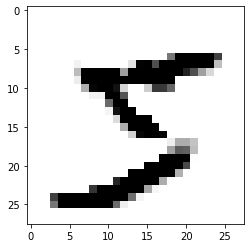

In [18]:
#違うフィルターを適用してみる
filter2 = np.array([[1,1,1],[1,1,1],[-2,-2,-2]])

#図示
x0_filtered=do_filter(x0,filter2)
plt.figure()
plt.imshow(x0_filtered,interpolation='nearest',vmin=0,vmax=255,cmap='binary')
plt.show()

<hr>
<hr>

# CNN

In [19]:
from keras.layers import Conv2D,MaxPooling2D
from keras.layers import Activation,Dropout,Flatten,Dense
from keras.optimizers import Adam

In [20]:
#データ再読み込み
(x_train,y_train),(x_test,y_test) = mnist.load_data()

x_train = x_train.reshape(60000,28,28,1)
x_train = x_train.astype('float32')
x_train = x_train/255
y_train = np_utils.to_categorical(y_train,10)

x_test = x_test.reshape(10000,28,28,1)
x_test = x_test.astype('float32')
x_test = x_test/255
y_test = np_utils.to_categorical(y_test,10)

In [21]:
#CNN
model2=Sequential()
#コンボリューション層定義、3*3のフィルターを8枚使用、パディング使用(same)、input_shape:入力画像のサイズ
model2.add(Conv2D(8,(3,3),padding='same',input_shape=(28,28,1),activation='relu'))
#コンボリューション層の出力の次元を(バッチ数、フィルター数*出力画像縦幅*出力画像横幅)にさせる
model2.add(Flatten())
#出力層定義、10個で活性化関数はソフトマックス関数
model2.add(Dense(10,activation='softmax'))
model2.compile(loss='categorical_crossentropy',optimizer=Adam(),metrics=['accuracy'])

history=model2.fit(x_train,y_train,epochs=20,batch_size=1000,verbose=1,validation_data=(x_test,y_test))
score=model2.evaluate(x_test,y_test,verbose=0)

print('交差エントロピー誤差:',score[0])
print('正答率:',score[1])

Epoch 1/20
60/60 [==============================] - 4s 70ms/step - loss: 0.8789 - accuracy: 0.7970 - val_loss: 0.3648 - val_accuracy: 0.9008
Epoch 2/20
60/60 [==============================] - 4s 67ms/step - loss: 0.3272 - accuracy: 0.9070 - val_loss: 0.2805 - val_accuracy: 0.9205
Epoch 3/20
60/60 [==============================] - 4s 68ms/step - loss: 0.2720 - accuracy: 0.9231 - val_loss: 0.2461 - val_accuracy: 0.9297
Epoch 4/20
60/60 [==============================] - 4s 68ms/step - loss: 0.2407 - accuracy: 0.9322 - val_loss: 0.2189 - val_accuracy: 0.9389
Epoch 5/20
60/60 [==============================] - 4s 68ms/step - loss: 0.2152 - accuracy: 0.9400 - val_loss: 0.2002 - val_accuracy: 0.9443
Epoch 6/20
60/60 [==============================] - 4s 68ms/step - loss: 0.1945 - accuracy: 0.9463 - val_loss: 0.1809 - val_accuracy: 0.9503
Epoch 7/20
60/60 [==============================] - 4s 68ms/step - loss: 0.1782 - accuracy: 0.9506 - val_loss: 0.1673 - val_accuracy: 0.9538
Epoch 8/20
60

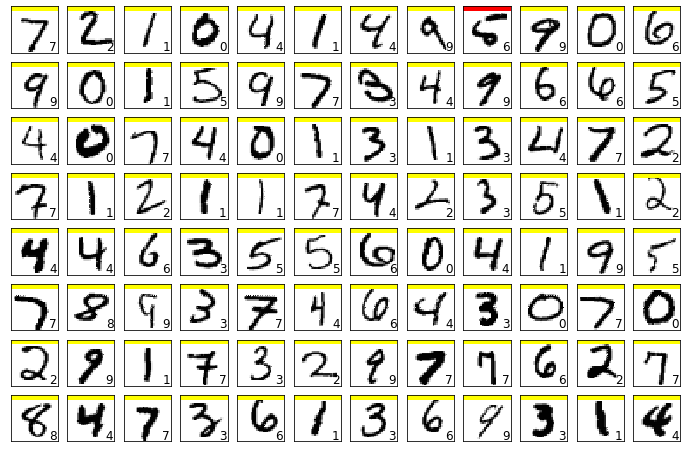

In [22]:
#再評価
#実際にテストデータを何個か評価してみる
y=model2.predict(x_test)
plt.figure(2,figsize=(12,8))
plt.gray()
for i in range(12*8):
    plt.subplot(8,12,i+1)
    x=x_test[i,:]
    x=x.reshape(28,28)
    plt.pcolor(1-x)
    wk=y[i,:]
    prediction=np.argmax(wk)
    plt.text(22,25.5,"%d" % prediction, fontsize=12)
    if prediction != np.argmax(y_test[i,:]):
        plt.plot([0,27],[1,1],color='red',linewidth=5)
    else:
        plt.plot([0,27],[1,1],color='yellow',linewidth=5)
    plt.xlim(0,27)
    plt.ylim(27,0)
    plt.xticks([],"")
    plt.yticks([],"")

plt.show() 